In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from good_eats import directories

In [2]:
filepath = directories.data("good_eats.csv")
df = pd.read_csv(filepath)

df.head()  # inspect the first few rows


,Agency,Time Period,Food Product Group,Food Product Category,Product Name,Product Type,Origin Detail,Distributor,Vendor,# of Units,Total Weight in lbs,Total Cost
0,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 2 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,100.0,560.0
1,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 3 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,106.0,600.0
2,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, formula","Premium Nursette Ready-to-Feed Infant Formula,...",Enfamil,Babylab Inc.,Babylab Inc.,200.0,1200.0,16200.0
3,Administration for Childrens Services,2018-2019,Beverages,Beverages,"juice, fruit punch, ss","100% Juice Variety Pack, 4 fl oz bottles",Enfamil,Babylab Inc.,Babylab Inc.,100.0,600.0,1940.0
4,Administration for Childrens Services,2018-2019,Condiments & Snacks,Condiments & Snacks,"cereal, baby, oatmeal",Single Grain Oatmeal Baby Cereal,Enfamil,Babylab Inc.,Babylab Inc.,10.0,60.0,290.0


# Dataset shape

There are 17208 rows and 12 columns.

In [3]:
df.shape

(17208, 12)

In [4]:
df.columns

Index(['Agency', 'Time Period', 'Food Product Group', 'Food Product Category',
       'Product Name', 'Product Type', 'Origin Detail', 'Distributor',
       'Vendor', '# of Units', 'Total Weight in lbs', 'Total Cost'],
      dtype='object')

In [5]:
df.Agency.unique()

array(['Administration for Childrens Services', 'Health + Hospitals',
       'Department of Homeless Services',
       "Administration for Children's Services",
       'Department of Education', 'Department of Correction',
       'Human Resources Administration'], dtype=object)

In [6]:
df["Food Product Group"].unique()

array(['Meals', 'Beverages', 'Condiments & Snacks',
       'Bread, Grains & Legumes', 'Meat', 'Milk & Dairy', 'Produce',
       'Seafood', 'Non-Food'], dtype=object)

In [7]:
df["Food Product Category"].unique()

array(['Meals', 'Beverages', 'Condiments & Snacks', 'Tree Nuts & Seeds',
       'Legumes', 'Grain Products', 'Beef', 'Cheese',
       'Turkey, Other Poultry', 'Rice', 'Fruit', 'Chicken', 'Yogurt',
       'Eggs', 'Seafood', 'Vegetables', 'Butter', 'Milk',
       'Roots & Tubers', 'Milk & Dairy', 'Meat', 'Pork',
       'Fish (Farm-Raised)', 'Fish (Wild)', 'Non-Food'], dtype=object)

In [8]:
df["Time Period"].unique()

array(['2018-2019', '2020-2021', '2019-2020'], dtype=object)

In [9]:
df["Product Name"].unique()

array(['baby food, dinner, assorted', 'baby food, formula',
       'juice, fruit punch, ss', ...,
       'raisin, unsweetened, ss, commodity',
       'carrot, shredded, commodity',
       'potato, sweet, cubed, frozen, commodity'],
      shape=(5752,), dtype=object)

In [10]:
df["Product Name"].value_counts()

Product Name
meal, lunch, kosher                        63
meal, breakfast, kosher                    63
juice, orange                              62
juice, apple                               57
vegetable, blend                           57
                                           ..
guacamole, western style, frozen            1
eggplant, breaded, fried                    1
eggplant, battered, fried                   1
jalapeno, cheddar, breaded, raw             1
potato, sweet, cubed, frozen, commodity     1
Name: count, Length: 5751, dtype: int64

# Missing `Total Cost`

Analysis of missing values confirms that **Department of Homeless Services** and **Health + Hospitals** never report `Total Cost`, while all other agencies provide cost information almost completely. Any spending-based analysis must therefore exclude these two agencies or treat them separately, although they remain valid for unit- and weight-based comparisons.

On the other hand, most other numerical values are present.


In [11]:
df.groupby('Agency')['Total Cost'].apply(lambda x: x.isna().mean()).sort_values()

Agency
Administration for Children's Services    0.000000
Administration for Childrens Services     0.000000
Department of Correction                  0.000000
Human Resources Administration            0.000000
Department of Education                   0.013514
Department of Homeless Services           1.000000
Health + Hospitals                        1.000000
Name: Total Cost, dtype: float64

In [12]:
df.groupby('Agency')['Total Weight in lbs'].apply(lambda x: x.isna().mean()).sort_values()

Agency
Administration for Children's Services    0.000000
Administration for Childrens Services     0.000000
Department of Correction                  0.000000
Human Resources Administration            0.000000
Department of Homeless Services           0.002766
Health + Hospitals                        0.002970
Department of Education                   0.007132
Name: Total Weight in lbs, dtype: float64

In [13]:
df.groupby('Agency')['# of Units'].apply(lambda x: x.isna().mean()).sort_values()

Agency
Administration for Children's Services    0.000000
Administration for Childrens Services     0.000000
Department of Correction                  0.000000
Department of Homeless Services           0.000000
Human Resources Administration            0.000000
Department of Education                   0.000375
Health + Hospitals                        0.005834
Name: # of Units, dtype: float64

# Original Detail

Original Detail has a highly skewed distribution with thousands of unique values.

In [14]:
df["Origin Detail"].value_counts()

Origin Detail
PACKER                                     247
Fresh, NA                                  197
FRESH                                      134
Yorkville                                  122
Whitsons, Islandia, NY                     113
                                          ... 
CAMPBELL'S, GARLAND, TX                      1
CAMPBELL'S RESERVE, UNIVERSITY PARK, IL      1
HILLSHIRE FARM, POTTSVILLE, PA               1
ADA VALLEY GOURMET FOODS, LIVERPOOL, NY      1
FINTEVA                                      1
Name: count, Length: 5093, dtype: int64

# Distributor and Vendor

The number of distributors and vendors are comparible.

In [15]:
df.Distributor.unique()

array(['Babylab Inc.', 'H. Schrier & Company Inc.',
       'Jay Bee Distributor Group', 'Mivila Foods',
       'Universal Coffee Corp', 'Romeo Wholesale Meat Corp.',
       'Cookies & More Inc.', 'Elwood International',
       'Global Food Industries', 'Jamac Frozen Foods',
       'Frank Gargiulo & Sons',
       'Driscoll Foods Food Service / Metropolitan Foods Inc.',
       'Baldor Specialty Foods', 'Teri Nichols', 'Cardinal Foods',
       'Environmental Agricultural Training / E.A.T. W/Culinary Professionals',
       'Finesse Creations', 'Plainfield Fruit & Produce Co Inc',
       'DS Services of America / Primo Water',
       'Nestle Waters North America', 'Sysco Corporate Headquarters',
       'Whitsons Culinary Group', 'Seneca Foods', 'MJM Marketing',
       'Coppermine Bakeries', 'Unilever United States Inc.',
       'General Mills', 'Gregory Packaging', 'Sally Sherman Foods',
       'Port Royal Sales', 'Rockland Bakery', 'White Coffee',
       'Cream O Land', 'JSB Industries', '

In [16]:
df.Vendor.unique()

array(['Babylab Inc.', 'H. Schrier & Company Inc.',
       'Jay Bee Distributor Group', 'Mivila Foods',
       'Universal Coffee Corp', 'Romeo Wholesale Meat Corp.',
       'Cookies & More Inc.', 'Elwood International',
       'Global Food Industries', 'Jamac Frozen Foods',
       'Frank Gargiulo & Sons',
       'Driscoll Foods Food Service / Metropolitan Foods Inc.',
       'Baldor Specialty Foods', 'Teri Nichols', 'Cardinal Foods',
       'Environmental Agricultural Training / E.A.T. W/Culinary Professionals',
       'Finesse Creations', 'Plainfield Fruit & Produce Co Inc',
       'DS Services of America / Primo Water',
       'Nestle Waters North America', 'Whitsons Culinary Group',
       'S. Bertram Foods', 'DiCarlo Food Service', 'Maramont',
       'Sysco Corporate Headquarters', nan, 'Cream O Land', 'Keefe Group',
       'Pacto Corporation', 'Wild Penguin Corporation', 'US Foods',
       'Valente Yeast Company', 'Golden Platter Foods',
       'Made Fresh Salads Inc', 'Kingsland 

# Histograms

The majority of values are close to zero.

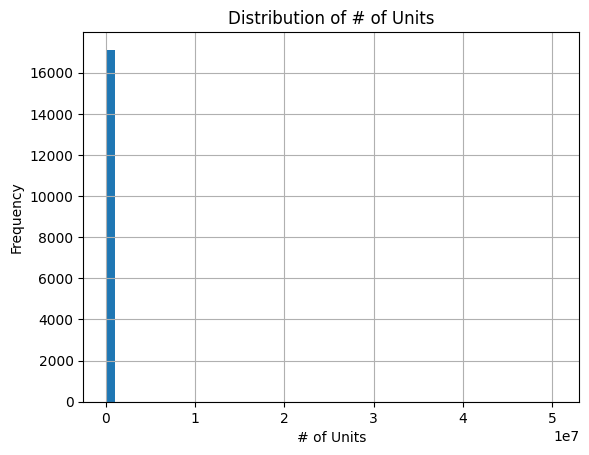

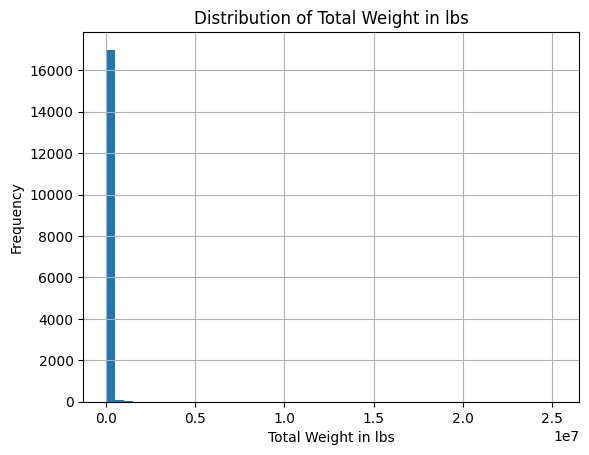

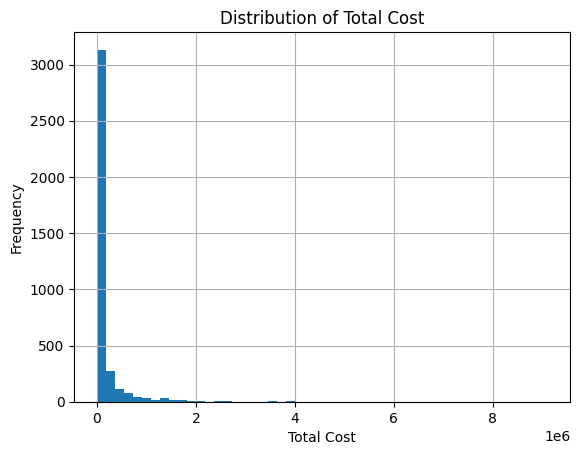

In [17]:
numeric_columns = ['# of Units', 'Total Weight in lbs', 'Total Cost']

for col in numeric_columns:
    plt.figure()
    df[col].dropna().hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Log plots

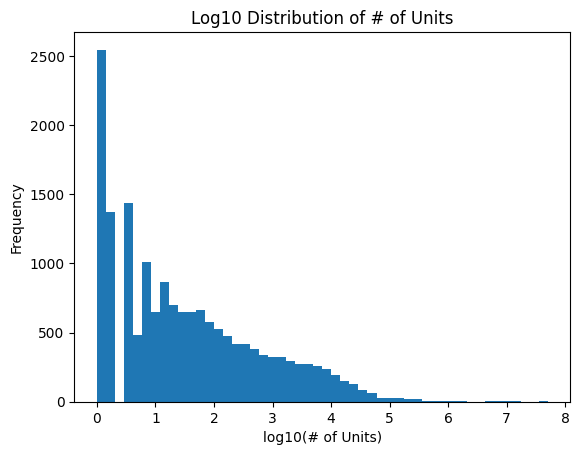

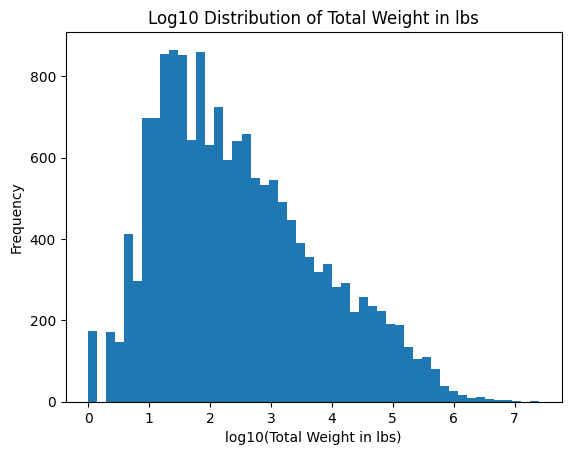

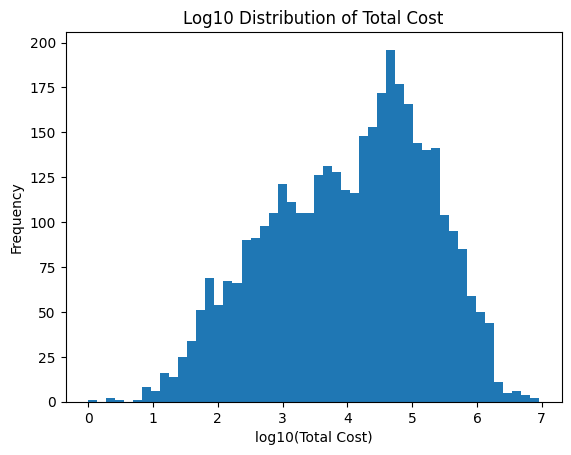

In [18]:
for col in numeric_columns:
    data = df[col].dropna()
    data = data[data > 0]                      # remove zeros to avoid -inf
    plt.figure()
    plt.hist(np.log10(data), bins=50)
    plt.title(f'Log10 Distribution of {col}')
    plt.xlabel(f'log10({col})')
    plt.ylabel('Frequency')
    plt.show()

# Boxplots & Violinplots for Direct Comparative Insight

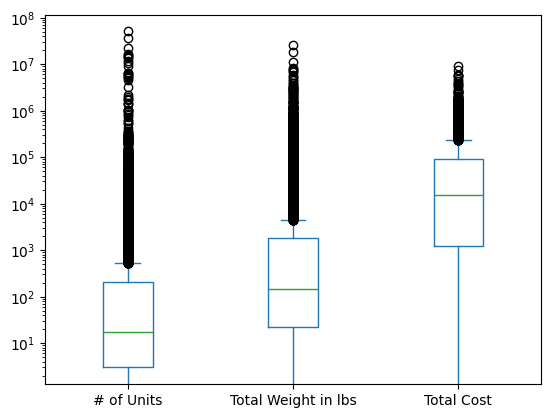

In [19]:
df[['# of Units','Total Weight in lbs','Total Cost']].plot(kind='box')
plt.yscale('log')
plt.show()